In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

import seaborn as sns
import mapclassify as mc
import matplotlib.pyplot as plt
import folium

import matplotlib.colors as colors


c:\users\swietek\documents\view\view_env\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
sns.set_theme()
# sns.set_style('white')
sns.set_context("paper", font_scale = 1)

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
dataset = pd.read_pickle('../../geodata/results/02_spatial_lagged_master.pkl')
# dataset = pd.read_pickle('../../../geodata/results/02_spatial_lagged_master.pkl')

ch_g2g18  = gpd.read_file('../../geodata/ch_districts/ch_districts_g2g18.gpkg')
# ch_g2g18  = gpd.read_file('../../../geodata/ch_districts/ch_districts_g2g18.gpkg')


In [4]:
# dataset['z'] = dataset.groupby('GMDNAME')['XGB'].transform(lambda x: (x - x.median()) / x.std())
dataset['z'] = (dataset.XGB - dataset.XGB.mean() )/ dataset.XGB.std()
dataset['nz'] = (dataset.nabr_avg_pred - dataset.nabr_avg_pred.mean() )/ dataset.nabr_avg_pred.std()

dataset['nz'] = (dataset.nabr_avg_pred - dataset.nabr_avg_pred.mean() )/ dataset.nabr_avg_pred.std()


dataset['err'] = np.log(dataset['XGB']/dataset['net_income_ptp'])
dataset['nerr'] = np.log(dataset['nabr_avg_pred']/dataset['net_income_ptp'])

dataset['zrr'] = dataset.groupby('GMDNAME')['err'].transform(lambda x: np.log(x - x.median()))

c:\users\swietek\documents\view\view_env\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\swietek\documents\view\view_env\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\swietek\documents\view\view_env\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\swietek\documents\view\view_env\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\swietek\documents\view\view_env\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\swietek\documents\view\view_env\li

<AxesSubplot:xlabel='err', ylabel='Count'>

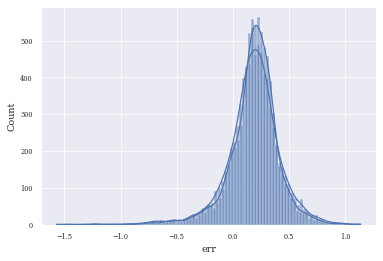

In [5]:
# sns.histplot(dataset.sample(10000), x='z', bins=100, kde=True)
# sns.histplot(dataset.sample(10000), x='nz', bins=100, kde=True)
sns.histplot(dataset.sample(10000), x='err', bins=100, kde=True)
sns.histplot(dataset.sample(10000), x='nerr', bins=100, kde=True)

In [6]:
sel_10agglo_lst = dataset.groupby(['Agglo_Name','Rich_Nabr'])['GMDNR'].size().unstack().sort_values(by = 'R', ascending = False).head(10).index.tolist()

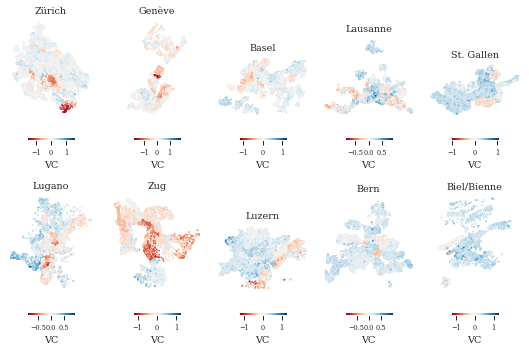

In [44]:
f, ax = plt.subplots(2,5, figsize=(7.5,5))
ax = ax.flatten()
for ix, agglo in enumerate(sel_10agglo_lst):
    # gmd = "Lausanne"#sel_10agglo_lst[8]
    tgt = 'err'
    x = dataset.query("Agglo_Name == @agglo")
    # g = ch_g2g18.query("GMDNAME == @gmd")
    # normalize color
    g = dataset.query("Agglo_Name == @sel_10agglo_lst")
    vmin, vmax, vcenter = g[tgt].min(), g[tgt].max(), 0
    # norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    norm = colors.CenteredNorm(vcenter=0)

    # g.plot(color='lightgrey', edgecolor='black', figsize=(5, 5), ax = ax)
    x.plot(column=tgt, cmap = 'RdBu', s = 1, legend=True, ax = ax[ix], norm = norm,
                        legend_kwds={'label': "VC", 'location':'bottom','orientation': "horizontal", 'shrink': 0.5})

    ax[ix].set_title(agglo)
    ax[ix].set_axis_off()
plt.tight_layout()

In [51]:
dataset['mm_pred'] =(dataset.XGB - dataset.XGB.min() )/(dataset.XGB.max() - dataset.XGB.min() )
dataset['mm_nabr_pred'] =(dataset.nabr_avg_pred - dataset.nabr_avg_pred.min() )/(dataset.nabr_avg_pred.max() - dataset.nabr_avg_pred.min() )


In [60]:
dataset.nabr_avg_pred.describe()

count    3.299410e+06
mean     8.790179e+01
std      1.209582e+01
min      1.386094e+01
25%      8.149316e+01
50%      8.529308e+01
75%      9.060744e+01
max      2.798645e+02
Name: nabr_avg_pred, dtype: float64

In [74]:
import contextily as cx

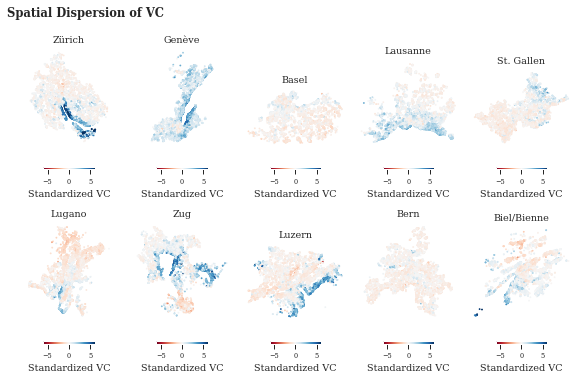

In [10]:
# Model 
f, ax = plt.subplots(2,5, figsize=(8,5))
ax = ax.flatten()
tgt = 'nz'
g = dataset.query("Agglo_Name == @sel_10agglo_lst")
vmin, vmax, vcenter = g[tgt].min(), g[tgt].max(), g[tgt].median()

for ix, agglo in enumerate(sel_10agglo_lst):
    # gmd = "Lausanne"#sel_10agglo_lst[8]
    
    x = dataset.query("Agglo_Name == @agglo").sample(10000)
    # g = ch_g2g18.query("GMDNAME == @gmd")
    # normalize color

    # norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    norm = colors.CenteredNorm(vcenter=0)
    norm = colors.LogNorm(vmin=vmin, vmax=vmax)

    # g.plot(color='lightgrey', edgecolor='black', figsize=(5, 5), ax = ax)
    x.plot(column=tgt, cmap = 'RdBu', s = 1, legend=True, ax = ax[ix], vmin = -6, vmax= 6, 
                        legend_kwds={'label': "Standardized VC", 'location':'bottom','orientation': "horizontal", 'shrink': 0.5}
                        )
    # cx.add_basemap(ax[ix], crs=dataset.crs.to_string(), source=cx.providers.Stamen.Terrain, alpha = .5, zoom = 15, attribution="")

    ax[ix].set_title(agglo)
    ax[ix].set_axis_off()
plt.tight_layout()
plt.suptitle('Spatial Dispersion of VC', fontsize = 'large', ha = 'left', x = 0, y = 1.05, fontweight = 'bold')

plt.savefig('../../figs/fig9_spatial_dist_agglo.jpg', dpi=300, bbox_inches='tight')

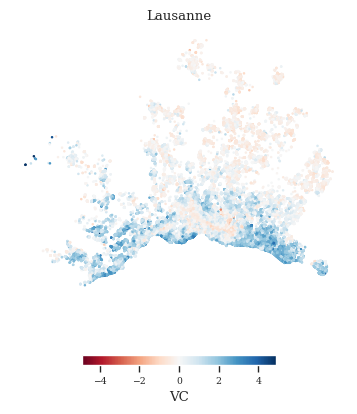

In [111]:

f, ax = plt.subplots(1,2, figsize=(5, 5))
gmd = "Lausanne"#sel_10agglo_lst[8]
tgt = 'nz'
x = dataset.query("Agglo_Name == @gmd")
# g = ch_g2g18.query("GMDNAME == @gmd")
# normalize color
vmin, vmax, vcenter = x[tgt].min(), x[tgt].max(), 0
# norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
norm = colors.CenteredNorm(vcenter=0)

# g.plot(color='lightgrey', edgecolor='black', figsize=(5, 5), ax = ax)
x.plot(column=tgt, cmap = 'RdBu', s = 1, legend=True, figsize=(5, 5), ax = ax[0], norm = norm,
                    legend_kwds={'label': "VC", 'location':'bottom','orientation': "horizontal", 'shrink': 0.5})

# g.plot(color='lightgrey', edgecolor='black', figsize=(5, 5), ax = ax)
x.plot(column='err', cmap = 'RdBu', s = 1, legend=True, figsize=(5, 5), ax = ax[0], norm = norm,
                    legend_kwds={'label': "VC", 'location':'bottom','orientation': "horizontal", 'shrink': 0.5})

ax.set_title(gmd)
ax.set_axis_off()

In [6]:
gdf = dataset.query("Agglo_Name == 'Lausanne'")
gdf.shape

(81852, 99)

In [7]:
#how many permutations are needed to reach 5% p-val?
print('We need {} permutations to reach a significance level of 5%'.format( 82000/ .05))

We need 1640000.0 permutations to reach a significance level of 5%


In [8]:
import pygeoda

In [10]:
# reset frame for pygeoda
gdf = gpd.GeoDataFrame(data = gdf, geometry = gdf.geometry).reset_index(drop = True)
sig_lvl = .05 / gdf.shape[0]
print(sig_lvl, 1/sig_lvl)

6.108586228803206e-07 1637040.0


In [11]:
%%time
geo_gdf = pygeoda.open(gdf)
type(geo_gdf)

Wall time: 3.94 s


pygeoda.gda.geodaGpd

In [12]:
%%time
knn_w  = pygeoda.weights.knn_weights(geo_gdf, k = 100, is_inverse = False, is_arc = False, is_mile = False)

Wall time: 3.42 s


In [15]:
%%time
#HEAVY!
# lm = pygeoda.local_moran(knn_w, geo_gdf['pred_reg_income_ptp'], permutations=9999)
lm = pygeoda.local_moran(knn_w, geo_gdf['XGB'], permutations = 2000000)
lms = lm.lisa_values()
lbls = lm.lisa_labels()

Wall time: 14h 2min 56s


In [16]:
gdf = (gdf.assign(lisa_cluster = lm.lisa_clusters(),
                  lisa_pvals = lm.lisa_pvalues())
      )
gdf.to_pickle('../../geodata/results/05_lausanne_lisa_01july23.pkl')

In [17]:
print("{:.20f}".format(min(lm.lisa_pvalues())))

0.00000049999975000012


In [18]:
sig_lvl = .05 / gdf.shape[0]
sig_lvl, min(lm.lisa_pvalues()), int(1/sig_lvl)

(6.108586228803206e-07, 4.99999750000125e-07, 1637040)

(Text(0, 0.5, 'neighbourhood average'), Text(0.5, 0, 'predicted value'))

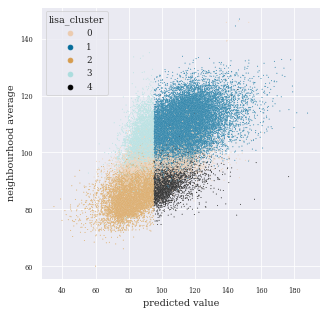

In [37]:
f, ax = plt.subplots(1, figsize=(5, 5))
sns.scatterplot(data = gdf, x = 'XGB', y = 'nabr_avg_pred', hue = 'lisa_cluster', s = 1, ax = ax, palette=["#ECCBAE", "#046C9A", "#D69C4E", "#ABDDDE", "#000000"])

ax.set_ylabel('neighbourhood average'), ax.set_xlabel('predicted value')
